# Lab 3: Pandas

(Last update: 26/11/2023)

Full name: Nguyễn Phương Nam  
Student ID: 21120504

---

**Tóm tắt**: In this assignment, you are going to learn how to use `Pandas`. Loops, and methods such as `apply/applymap` are not allowed to use unless specifically instructed to do so.

## 0. General instructions

### 0.0. Work on assignment

- You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
    ```python
    # TODO
    raise NotImplementedError()
    ```

    For optional coding parts, there will be:

    ```python
    # TODO (OPTIONAL)
    ```

    For markdown cell, there will be:

    ```markdown
    **TODO**: ...
    ```

- Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

- For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

- While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

- Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines. Press `Ctrl + S` right after editing.

- **Keep it real**: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

### 0.1. Submit your assignment

- When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename the notebook as `<Student ID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

- Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Import libraries

In [35]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')
# TODO (OPTION): import your libraries

## 2. Data collection

- I have done that for you. In this assignment, you are going to analyze a dataset collected from **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. You are provided the following files:
    - `./survey.csv`: Survey results of more than 300 people taking part in the survey on GoogleForm. You will mainly work on this file.
    - `./survey.xlsx`: The content is similar to `./survey.csv` but you can open it in Excel to have a better view.
    - `./form.pdf`: Questionnaire survey.

- Read `./form.pdf` and summarize the survey by indicating **sections** in the form as well as **possible scenarios** when conducting the survey.

    **TODO**: ...
    - Section 1: General information
    - Section 2: Facial cleanser consumption behavior
    - Possible scenarios:
        - Sampling bias: The survey was created by a group of students at the University of Economics Ho Chi Minh City, so most of the respondents are their friends who are also students at the same university.
        - Non-response bias: the survey is conducted online, so the respondents may not be honest with their answers.

- Data source: Võ Thị Minh Trà, University of Economics Ho Chi Minh City.

## 3. Data pre-processing and exploration

- In this section, you are going to explore features of data. First, you have to read the data from `./survey.csv` and store it into a dataframe called `survey_df`.

In [36]:
# TODO: read data from ./survey.csv and save to survey_df then display 5 first lines of data
# raise NotImplementedError()
survey_df = pd.read_csv('./data/survey.csv')
survey_df.head()

,Dấu thời gian,Bạn bao nhiêu tuổi?,Hiện tại bạn đang cư trú ở đâu?,Bạn đã sử dụng sữa rửa mặt bao giờ chưa?,Nguyên nhân bạn chưa sử dụng sữa rửa mặt là gì?,Giới tính của bạn là?,1. Bạn sử dụng sữa rửa mặt với mục đích gì?,2. Da của bạn thuộc loại da gì?,3. Bạn thường sử dụng sữa rửa mặt bao nhiêu lần một ngày?,4. Bạn sử dụng sữa rửa mặt khi nào?,...,20. Bạn lo ngại điều gì khi sử dụng sữa rửa mặt?,"21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nb, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Chất lượng]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thương hiệu]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Giá cả]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mẫu mã]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Xuất xứ]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thành phần]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mùi hương]","22. Nếu chúng tôi ra mắt một sản phẩm sữa rửa mặt mới, bạn có sẵn sàng dùng thử hay không?",23. Bạn mong muốn điều gì nhất ở một sản phẩm sữa rửa mặt mới?
0,04/02/2023 20:10:08,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


### 3.0. How many rows/columns are there in the dataset?

- Save the number of rows and columns to `n_rows, n_cols`

In [37]:
# TODO: save your answer to n_rows, n_cols
# raise NotImplementedError()

n_rows, n_cols = survey_df.shape

n_rows, n_cols

(337, 38)

In [38]:
# TEST
assert (n_rows, n_cols) == (337, 38)

### 3.1. Explore rows

- Each row is a result, which is done by the person taking part in the survey. These people conducted the survey on GoogleForm. The results are then saved to a sheet and converted to `*.csv` and `*.xlsx`

- Is there any duplicate row? You will check it using `Pandas`.

In [39]:
# TODO: save your answer to is_duplicate
# raise NotImplementedError()

is_duplicate = survey_df.duplicated().any()

In [40]:
# TEST
assert is_duplicate == False

### 3.2. Explore columns

- Observe the data provided, carefully read the column titles as well as the data contained in the columns, and compare them with the survey questionnaire to gain knowledge about the data.
- Since the column titles are too long, we have to re-name them in order to work on them easily.

In [41]:
# TODO: rename the columns. 
newnames = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
# raise NotImplementedError()

survey_df.columns = newnames

In [42]:
# TEST
assert (survey_df.columns == ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]).all()

### 3.3. Remove meaningless rows and columns

- Once again, this is **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. That means those people who do not live in HCM City or those whose age is not in the range of [18-25] will be removed.
- After removing these people, column `Tuổi` and `Địa_chỉ` become meaningless since they contain the same data. Therefore, we also remove these columns.

In [43]:
# TODO: remove those whose age is not within the range [18-25] and whose address is not HCM City
# TODO: then, remove 2 corresponding columns
# raise NotImplementedError()

survey_df = survey_df[survey_df['Tuổi'] == 'Từ 18 - 25 tuổi'] 
survey_df = survey_df[survey_df['Địa_chỉ'] == 'TP.HCM']
survey_df = survey_df.drop(['Tuổi', 'Địa_chỉ'], axis=1)

In [44]:
# TEST
assert survey_df.shape == (309, 36)
assert set(['Tuổi', 'Địa_chỉ']).intersection(set(survey_df.columns)) == set()

- The survey participants must be those who use facial cleanser. That means those who have not used cleanser are meaningless to the survey. You have to remove these people from the data.

- After removing these people, column `Đã_dùng_srm` and column `Lý_do_chưa_sd` become meaningless since thay contain the same data. Therefore, we also remove these columns.

In [45]:
# TODO: remove those who have not used facial cleanser
# TODO: then, remove 2 corresponding columns
# raise NotImplementedError()

survey_df = survey_df[survey_df['Đã_dùng_srm?'] == 'Đã từng']
survey_df = survey_df.drop(['Đã_dùng_srm?', 'Lý_do_chưa_sd'], axis=1)


In [46]:
# TEST
assert survey_df.shape == (305, 34)
assert set(['Đã_dùng_srm?', 'Lý_do_chưa_sd']).intersection(set(survey_df.columns)) == set()

### 3.4. Handle missing data & Convert data

- Next, we start handling missing data. Run function `info()` so you can overview your data.

In [47]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 335
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Thời_gian                         305 non-null    object 
 1   Giới_tính                         305 non-null    object 
 2   1_Mục_đích_sd_srm                 305 non-null    object 
 3   2_Loại_da                         305 non-null    object 
 4   3_Tuần_suất_1ngày                 305 non-null    object 
 5   4_Sd_khi_nào                      305 non-null    object 
 6   5_Mua_ở_đâu                       305 non-null    object 
 7   6_Quảng_cáo_ở_đâu                 305 non-null    object 
 8   7_Chiết_xuất                      305 non-null    object 
 9   8_Srm_đang_sd                     305 non-null    object 
 10  9_Srm_có_mùi_hương?               305 non-null    object 
 11  91_Thích_hương_trái_cây?          166 non-null    object 
 12  92_Thích

- You can see that, most of the columns do not have missing data except columns `91_Thích_hương_trái_cây?`, `92_Thích_hương_rau_củ?` and `93_Thích_hương_hoa_cỏ?`. They are missing nearly 50% number of rows.

- State the reason. Then, conclude whether we should handle missing data. If you decided to handle missing data, how would you do that?

    **TODO**: ...
    - The survey skipped these questions due to the answer to question 9 - '9. Bạn có thích sữa rửa mặt có mùi hương không?' being 'Không.'
    - Therefore, the missing values in these columns are reasonable, and we can either leave them as null or fill them with 'Không.'"

- Observe the result returned by `info()`, you are able to gain some information about columns. From there, you will convert:
    - `Thời_gian`: `Datetime`
    - Columns `21_*` (columns which start with `21_`): `Int`. The reason is that these columns contain number from 1 (`Rất không ảnh hưởng`) to 7 (`Rất ảnh hưởng`). You can use `for` loop here in order to loop through the columns and convert them.

- State the reason why the data type of columns `21_*` is `np.float64` instead of `np.int64` (before conversion).

    **TODO**: ...
    - As there are null values in these columns when the answer to the question 'Đã_dùng_srm?' is 'Chưa từng,' these rows were removed in the previous step. However, the data type of these columns still remains as float64.

In [48]:
# TODO: convert column `Thời_gian` to datetime and columns `21_*` to int
# raise NotImplementedError()
survey_df['Thời_gian'] = pd.to_datetime(survey_df['Thời_gian'], format='%d/%m/%Y %H:%M:%S')

for col in survey_df.columns:
    if col.startswith('21_'):
        survey_df[col] = survey_df[col].astype(int)


In [49]:
# TEST
assert survey_df['Thời_gian'].dt.day.max() == 12
assert (survey_df.dtypes[1:] == [object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, object, object]).all()

### 3.5. Data distribution in columns

- In this section, you are going to extract the distribution of data in each column.Specifically, there are 2 types of columns: **Categorical** and **Numeric**. For each type, there are different ways to extract the distribution.
- First, we will work on numeric columns. You will perform 2 steps:
    - Step #1: Determine the quantile values **(min, 25%, 50%, 75%, max)**: Save your answer to `numeric_col_profile`. This variable is a dataframe whose index column is `["min", "25%", "50%", "75%", "max"]` and column names are similar to the name of numeric columns.
    - Step #2: Draw a histogram to visualize the distribution.

In [50]:
# TODO: compute quantile values of numeric columns ("21_*" columns)
# raise NotImplementedError()

numeric_col_profile = survey_df[["21_Mức_ảnh_hưởng_của_chất_lượng",
                                "21_Mức_ảnh_hưởng_của_thương_hiệu",
                                "21_Mức_ảnh_hưởng_của_giá_cả",
                                "21_Mức_ảnh_hưởng_của_mẫu_mã",
                                "21_Mức_ảnh_hưởng_của_xuất_xứ",
                                "21_Mức_ảnh_hưởng_của_thành_phần",
                                "21_Mức_ảnh_hưởng_của_mùi_hương"]]

def percentile_25(x):
    return x.quantile(0.25)
def percetile_50(x):
    return x.quantile(0.5)
def percentile_75(x):
    return x.quantile(0.75)
                                
numeric_col_profile = numeric_col_profile.agg([min, percentile_25, percetile_50, percentile_75, max])
numeric_col_profile.index = ['min', '25%', '50%', '75%', 'max']
numeric_col_profile

,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,5.0,4.0,4.0,3.0,4.0,5.0,3.0
50%,7.0,5.0,5.0,4.0,5.0,6.0,5.0
75%,7.0,6.0,6.0,5.0,6.0,7.0,6.0
max,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [51]:
# TEST
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_chất_lượng'])  == {'min': 1.0, '25%': 5.0, '50%': 7.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thương_hiệu'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_giá_cả'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mẫu_mã'])  == {'min': 1.0, '25%': 3.0, '50%': 4.0, '75%': 5.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_xuất_xứ'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thành_phần'])  == {'min': 1.0, '25%': 5.0, '50%': 6.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mùi_hương'])  == {'min': 1.0, '25%': 3.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}

- In step #2, you will draw data distributions in order to understand more about numeric columns. You will draw all distributions in one figure (all charts should share the same y-axis). Note that you have to choose the number of `bins`. Propose a number of `bins` and explain why.

    **TODO**: ...
    - I'm choosing 7 bins because each factor in the columns 21_* has 7 levels, ranging from 'Rất không ảnh hưởng' to 'Rất ảnh hưởng.'
    - Consequently, the histogram will display the distribution of each level.

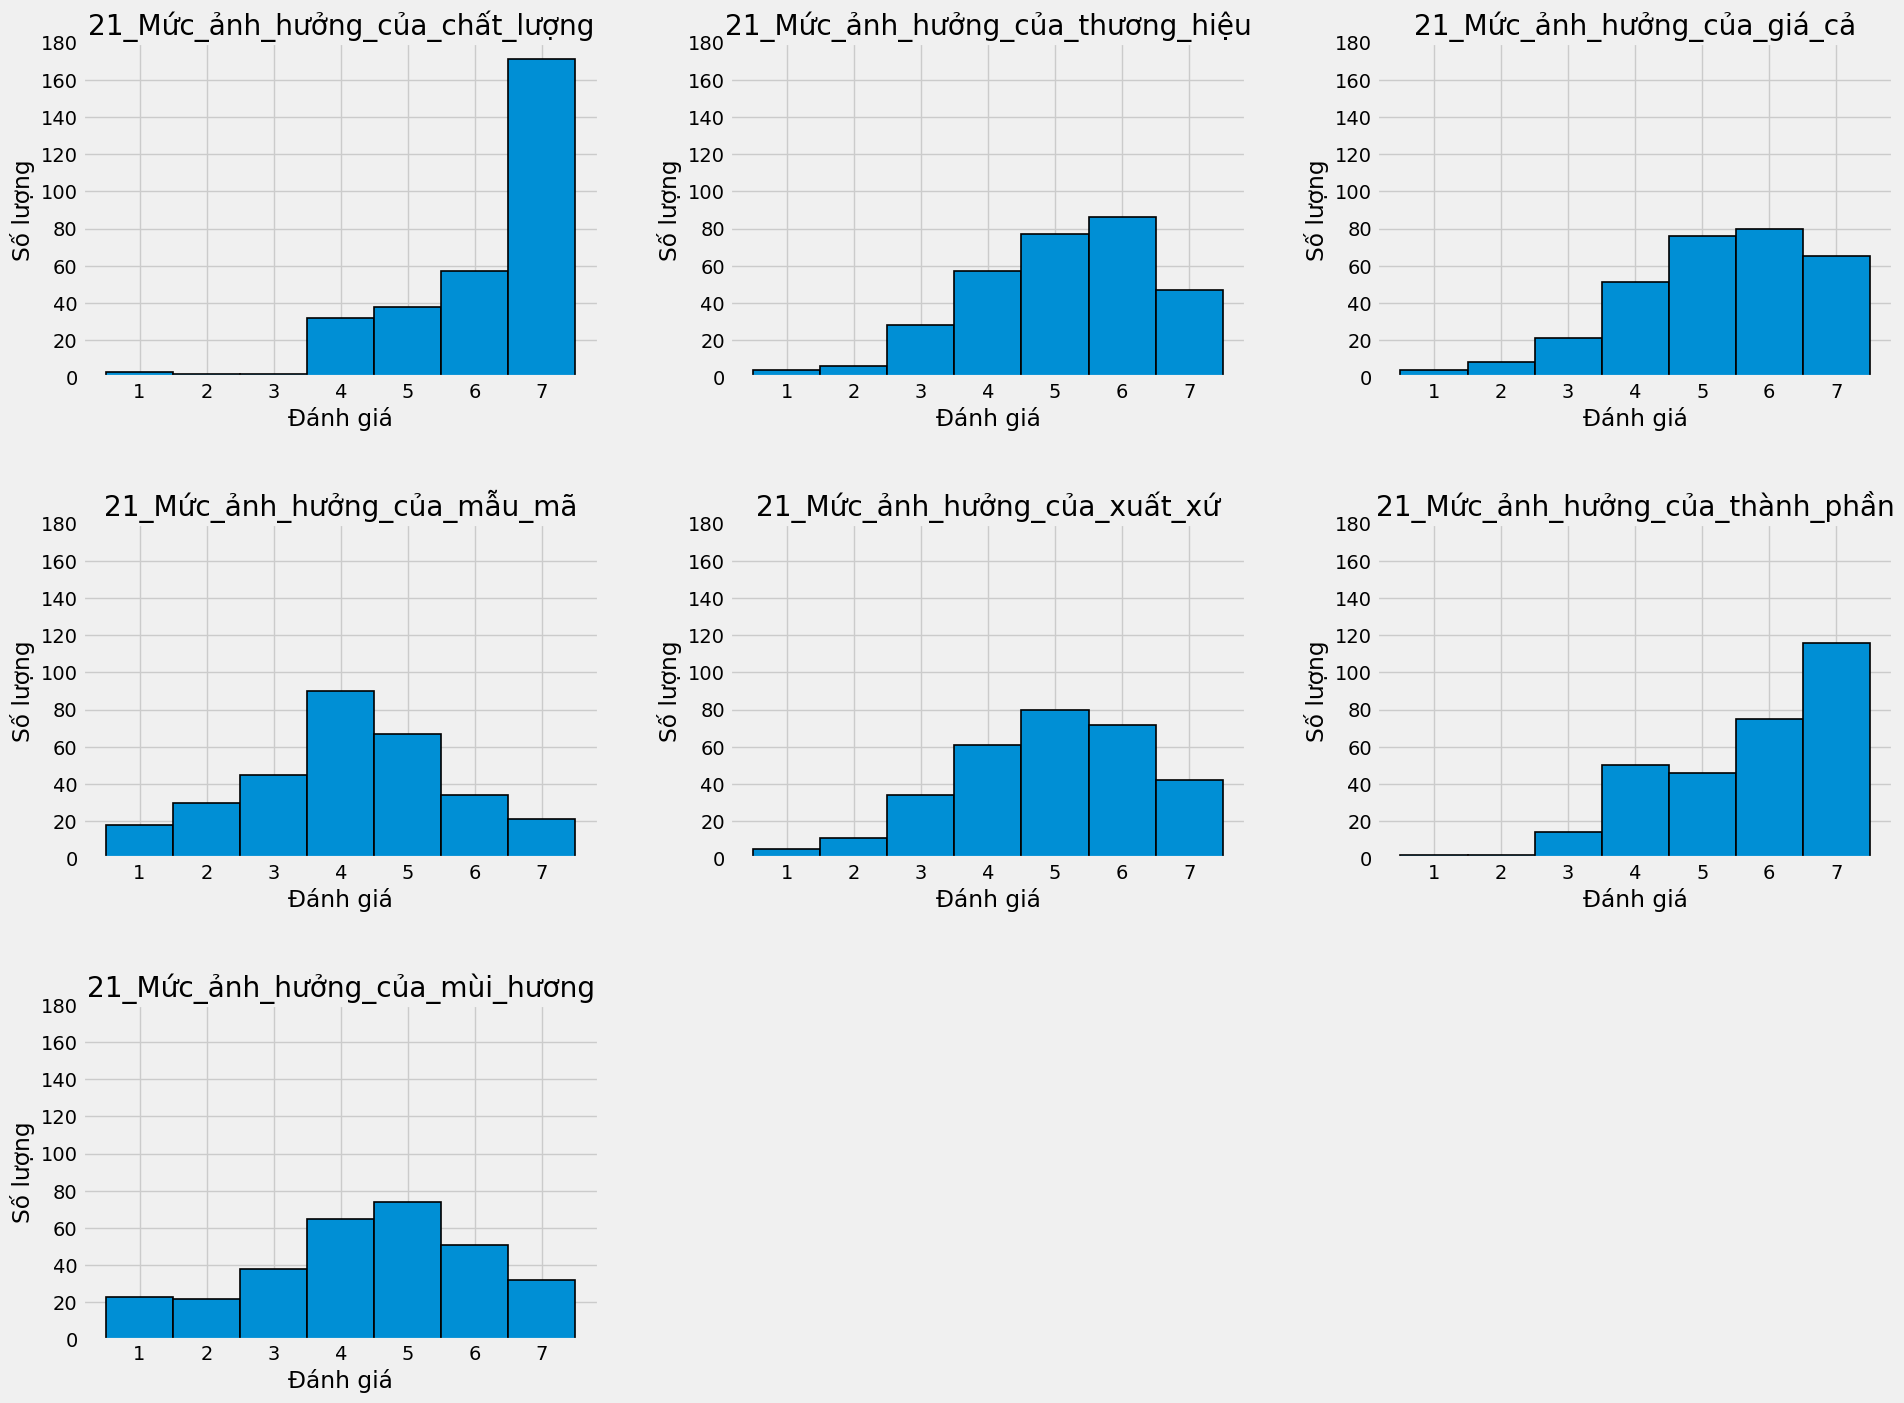

In [52]:
# TODO: draw 7 histogram in one figure
# raise NotImplementedError()

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()



for i, col in enumerate(numeric_col_profile.columns):
    # There are 7 bins: (0.5-1.5), (1.5-2.5), ..., (6.5-7.5). Each label corresponds to the middle point of its respective bin.
    axes[i].hist(survey_df[col], bins=np.arange(1, 9) -0.5, edgecolor='black', linewidth=1.2)
    axes[i].set_title(col)
    axes[i].set_xlabel('Đánh giá')
    axes[i].set_ylabel('Số lượng')
    axes[i].set_xticks(range(1, 8))
    axes[i].set_xticklabels(range(1, 8))
    axes[i].set_yticks(range(0, 200, 20))

# Remove the last two axes (empty)
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.tight_layout(pad=3.0)
plt.show()

- According to the above distributions, what factors do the survey participants care about when buying facial cleanser? Why?

    **TODO**: The most notable factor is 'chất lượng' as its distribution is highly concentrated at the highest level (7).

- This is a crucial insight since it offered data that may be used to plan marketing campaigns or the development of new product manufacturing plans.

- After handling numeric columns, you will handle categorical columns. Note that there are 2 type of survey questions:
    - Multiple choice, single answer: In this lab, it is not required to pre-process these columns.
    - Multiple choice, multiple answer: Have to pre-process.

- Here, you will work on the first one. You will perform these following steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding.
        - For example: In `Giới_tính`, we have the number of different attributes is 2 (`Nam` and `Nữ`). The dictionary is `{"Nữ": 244, "Nam": 61}` since there are 244 female participants and 61 male participants.
        - Save your result to a dataframe called `single_cate_profile`. The index column of dataframe is `["num_diff_vals", "distribution"]` and column names are similar to the name of categorical columns.
    - Step #2: Visualize the distribution using pie chart. You can use `for` loop to draw the charts.

In [53]:
single_answer_cols = ['Giới_tính', '2_Loại_da', '3_Tuần_suất_1ngày', '7_Chiết_xuất', '8_Srm_đang_sd', '9_Srm_có_mùi_hương?', '10_Dung_tích', '11_Số_lượng_mua', '12_Chi_tiền_cho_150ml', '13_Tiêu_chí_chọn_srm', '14_Ai_tư_vấn', '18_Tiêu_chí_mua_offline', '19_Tiêu_chí_mua_online', '22_Dùng_thử?', '23_Kỳ_vọng']
df = survey_df[single_answer_cols]

# TODO: code step 1
# raise NotImplementedError()

single_cate_profile = pd.DataFrame(columns=single_answer_cols, index=['num_diff_vals', 'distribution'])
single_cate_profile.loc['num_diff_vals'] = df.nunique()
single_cate_profile.loc['distribution'] = df.agg(lambda x: x.value_counts().to_dict())


single_cate_profile

,Giới_tính,2_Loại_da,3_Tuần_suất_1ngày,7_Chiết_xuất,8_Srm_đang_sd,9_Srm_có_mùi_hương?,10_Dung_tích,11_Số_lượng_mua,12_Chi_tiền_cho_150ml,13_Tiêu_chí_chọn_srm,14_Ai_tư_vấn,18_Tiêu_chí_mua_offline,19_Tiêu_chí_mua_online,22_Dùng_thử?,23_Kỳ_vọng
num_diff_vals,2,6,4,2,4,2,4,3,4,6,5,5,5,3,5
distribution,"{'Nữ': 244, 'Nam': 61}","{'Da hỗn hợp': 98, 'Da dầu': 93, 'Da khô': 45,...","{'2 lần/ngày': 191, '1 lần/ngày': 76, 'Ít hơn ...","{'Chiết xuất từ các hoạt chất hóa học': 160, '...","{'Dạng gel': 199, 'Dạng bọt': 39, 'Dạng kem': ...","{'Có': 166, 'Không': 139}","{'Trên 150 ml - 300 ml': 168, '50 ml - 150 ml'...","{'Từ 1-2 sản phẩm/1 lần mua': 273, 'Từ 3-5 sản...","{'Từ 100.000 vnđ - 200.000 vnđ/150 ml': 203, '...","{'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 4...","{'Review từ KOL, beauty blogger, người nổi tiế...","{'Uy tín của cửa hàng': 157, 'Nguồn thông tin ...","{'Đánh giá từ những người đã mua': 144, 'Nguồn...","{'Chưa biết': 204, 'Có': 84, 'Không': 17}","{'Sản phẩm chuyên sâu với hiệu quả cao': 138, ..."


In [54]:
# TEST
assert dict(single_cate_profile['Giới_tính']) == {'num_diff_vals': 2, 'distribution': {'Nữ': 244, 'Nam': 61}}
assert dict(single_cate_profile['13_Tiêu_chí_chọn_srm']) == {'num_diff_vals': 6, 'distribution': {'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 44, 'Thể tích, dung tích': 9,'Mùi hương': 7,'Bao bì': 2}}

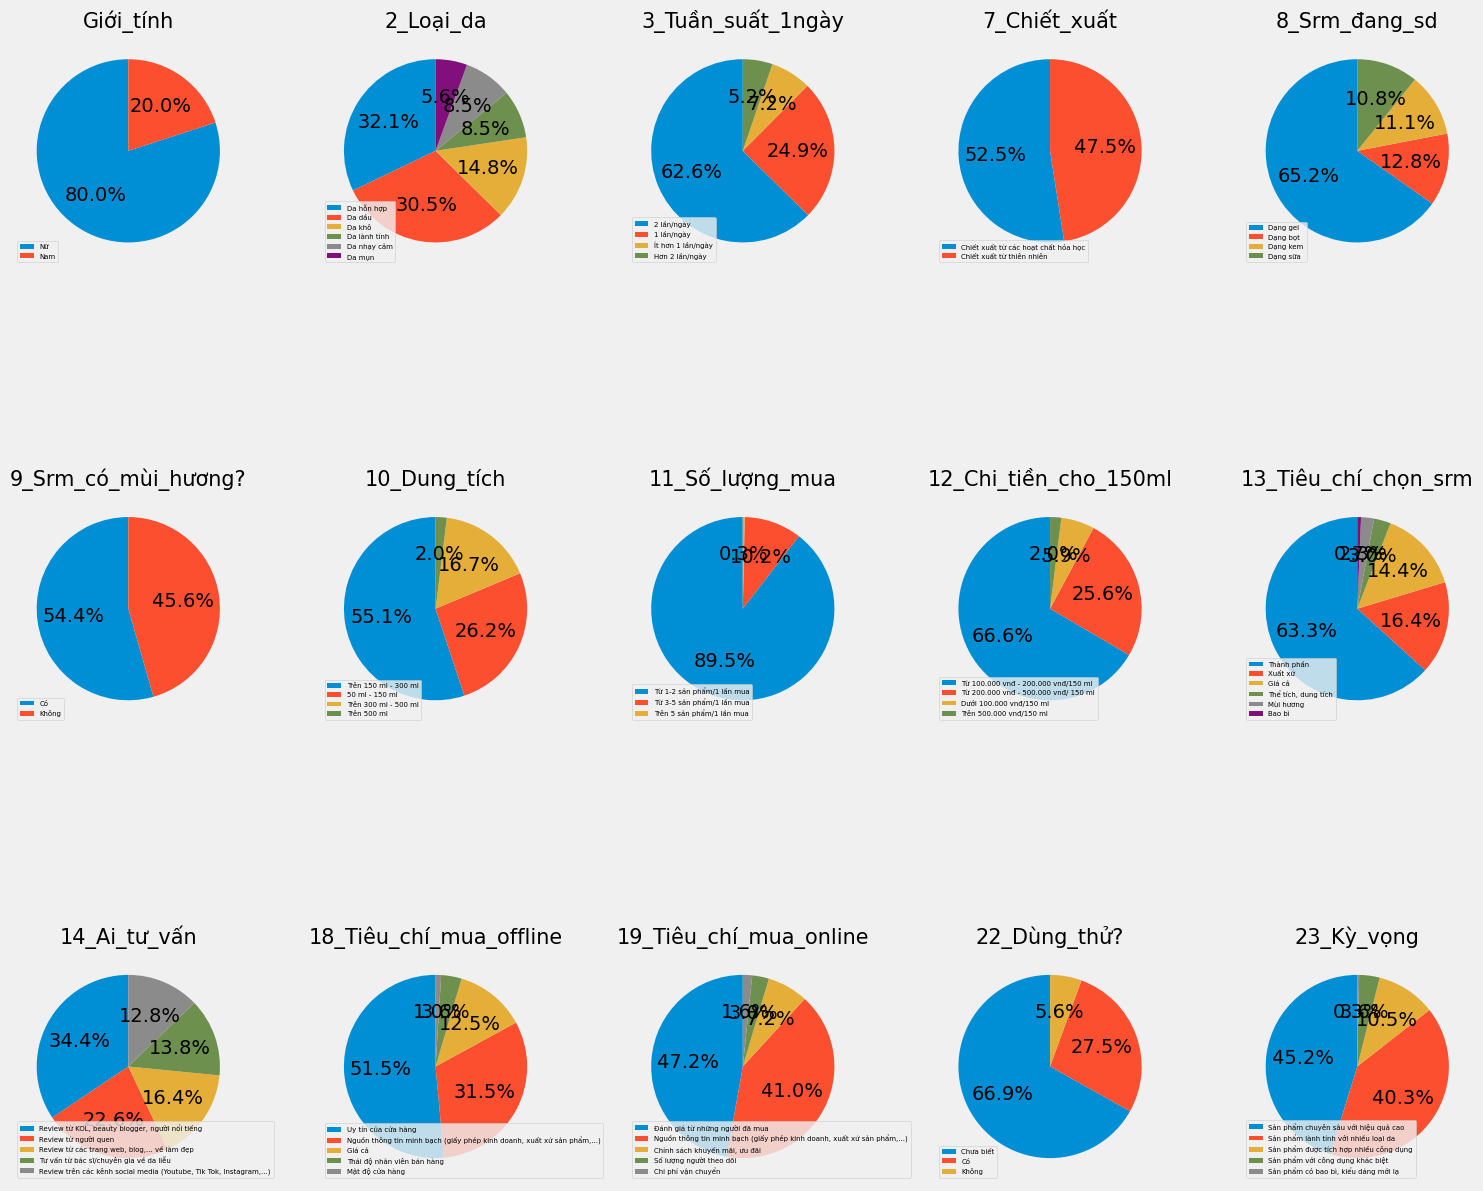

In [75]:
# TODO: code step 2
# raise NotImplementedError()

fig, axes = plt.subplots(3, 5, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(single_answer_cols):
    distribution = single_cate_profile.loc['distribution', col]
    x = list(distribution.keys())
    y = list(distribution.values())
    # Plot pie chart
    axes[i].pie(y, autopct='%1.1f%%', startangle=90)
    
    axes[i].legend(loc='lower left', labels=x, prop={'size': 5})
    
    axes[i].set_title(col, fontsize=15)


plt.tight_layout()
plt.show()

- Look at the above charts, you can gain some information about the distribution of categorical columns with single answer. For example, you can easily point out that most of participants clean their face twice a day, buy the cleanser product according to the instructions of KOLs and beauty blogger,...
- This information will help you a lot in deciding what and how to buy a cleanser product.

- Next, we will compute the distribution of multiple answer columns. You also perform the following familiar steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding. Save your result to a dataframe called `multiple_cate_profile`. Note that in columns `'91_*', '92_*', '93_*'`, there are user-defined values, which are recorded from `Mục khác`. You have to replace these values with `Khác` (you can use `apply` for replacing). For example, column `91_Thích_hương_trái_cây?` has 8 original values (see `./form.pdf`). The rest values will be replace with `Khác`.
    - Step #2: Visualize the 5 values with the highest frequency of occurrence using bar chart. You can use `for` loop to draw the charts.

- Note that do not touch `df` since it will be used to check your answer.

In [56]:
multi_answer_cols = ['1_Mục_đích_sd_srm','4_Sd_khi_nào','5_Mua_ở_đâu','6_Quảng_cáo_ở_đâu','91_Thích_hương_trái_cây?','92_Thích_hương_rau_củ?','93_Thích_hương_hoa_cỏ?','15_Xuất_xứ','16_Mua_online_ở_đâu','17_Mua_offline_ở_đâu','20_Lo_ngại_về_srm']
df = survey_df[multi_answer_cols]

# TODO: code step 1
# raise NotImplementedError()

default_options = {
    '91_Thích_hương_trái_cây?': ['Dâu','Táo','Mâm xôi','Cherry','Việt quất','Đào','Cam','Chanh'],
    '92_Thích_hương_rau_củ?': ['Dưa leo','Thảo mộc','Nha đam','Rau má','Cà chua','Cần tây'],
    '93_Thích_hương_hoa_cỏ?': ['Lavender','Hoa hồng','Anh đào','Trà xanh','Hoa sứ','Hoa cúc'],
    '15_Xuất_xứ': ['Mỹ','Canada','Nhật Bản','Hàn Quốc','Trung Quốc','Úc','Pháp','Đức','Anh','Việt Nam']
}


def clean_and_replace(col_data, col_name):

    # Remove leading and trailing spaces and commas
    col_data = col_data.str.strip().str.strip(',')

    # Remove these terms: ",  ," or ",," or ", " or " ,"
    space_pattern = re.compile(r'(,[ ]*,|,[ ]+|[ ]+,)')
    col_data = col_data.str.replace(space_pattern, ',')

    # Replace the value with "Khác" if it is not in the default options
    if col_name in list(default_options.keys()):

        options = default_options[col_name]
        option_pattern = '|'.join(options)
        option_pattern = r'^[^ ]*(' + option_pattern + r')[^ ]*$'  # r'(' + option_pattern + r')' is more general but fails test cases
        option_pattern = re.compile(option_pattern)
                        
        def conditional_replace(match):
            # Take out the value separated by commas
            value = match.group(1)

            is_match = re.match(option_pattern, value)
            # Using group(1) to remove the leading and trailing characters
            replacement = "Khác" if is_match is None else is_match.group(1)

            return replacement

        col_data = col_data.apply(lambda x:     
                                  # Using sub() to replace the values in the string
                                  re.sub(r'([^,]+)', conditional_replace, x)  # r'([^,]+)' uses to split the string by commas
                                  if pd.notna(x) else x)

    return col_data
    
    
clean_df = df.agg(lambda x: clean_and_replace(x, x.name))
exploded_df = clean_df.apply(lambda x: x.str.split(',').explode().reset_index(drop=True)) # Split the string by commas and convert to a Series

multiple_cate_profile = pd.DataFrame(columns=multi_answer_cols, index=['num_diff_vals', 'distribution'])
multiple_cate_profile.loc['num_diff_vals'] = exploded_df.nunique()
multiple_cate_profile.loc['distribution'] = exploded_df.agg(lambda x: x.value_counts().to_dict())

multiple_cate_profile


,1_Mục_đích_sd_srm,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,91_Thích_hương_trái_cây?,92_Thích_hương_rau_củ?,93_Thích_hương_hoa_cỏ?,15_Xuất_xứ,16_Mua_online_ở_đâu,17_Mua_offline_ở_đâu,20_Lo_ngại_về_srm
num_diff_vals,7,5,9,8,9,7,7,11,3,6,4
distribution,{'Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...':...,"{'Trước khi đi ngủ': 242, 'Sau khi thức dậy': ...","{'Các sàn thương mại điện tử': 213, 'Các cửa h...","{'Truyền thông; quảng cáo': 205, 'Tự tìm hiểu'...","{'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36...","{'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47,...","{'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 6...","{'Hàn Quốc': 184, 'Nhật Bản': 111, 'Mỹ': 100, ...","{'Sàn thương mại điện tử': 253, 'Website của h...","{'Các cửa hàng mỹ phẩm': 198, 'Cửa hàng chính ...","{'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gâ..."


In [57]:
# TEST
assert list(multiple_cate_profile.to_numpy()[0]) == [7, 5, 9, 8, 9, 7, 7, 11, 3, 6, 4]
assert dict(multiple_cate_profile['20_Lo_ngại_về_srm']) == {'num_diff_vals': 4, 'distribution': {'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gây kích ứng; bong tróc da': 141, 'Sản phẩm không có nguồn gốc rõ ràng': 104, 'Không có hiệu quả hoặc hiệu quả kém': 44}}
assert dict(multiple_cate_profile['91_Thích_hương_trái_cây?']) == {'num_diff_vals': 9, 'distribution': {'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36, 'Chanh': 34, 'Dâu': 34, 'Việt quất': 33, 'Khác': 13, 'Mâm xôi': 11}}
assert dict(multiple_cate_profile['92_Thích_hương_rau_củ?']) == {'num_diff_vals': 7, 'distribution': {'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47, 'Dưa leo': 35, 'Cà chua': 20, 'Cần tây': 5, 'Khác': 4}}
assert dict(multiple_cate_profile['93_Thích_hương_hoa_cỏ?']) == {'num_diff_vals': 7, 'distribution': {'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 68, 'Anh đào': 49, 'Hoa cúc': 20, 'Hoa sứ': 7, 'Khác': 3}}

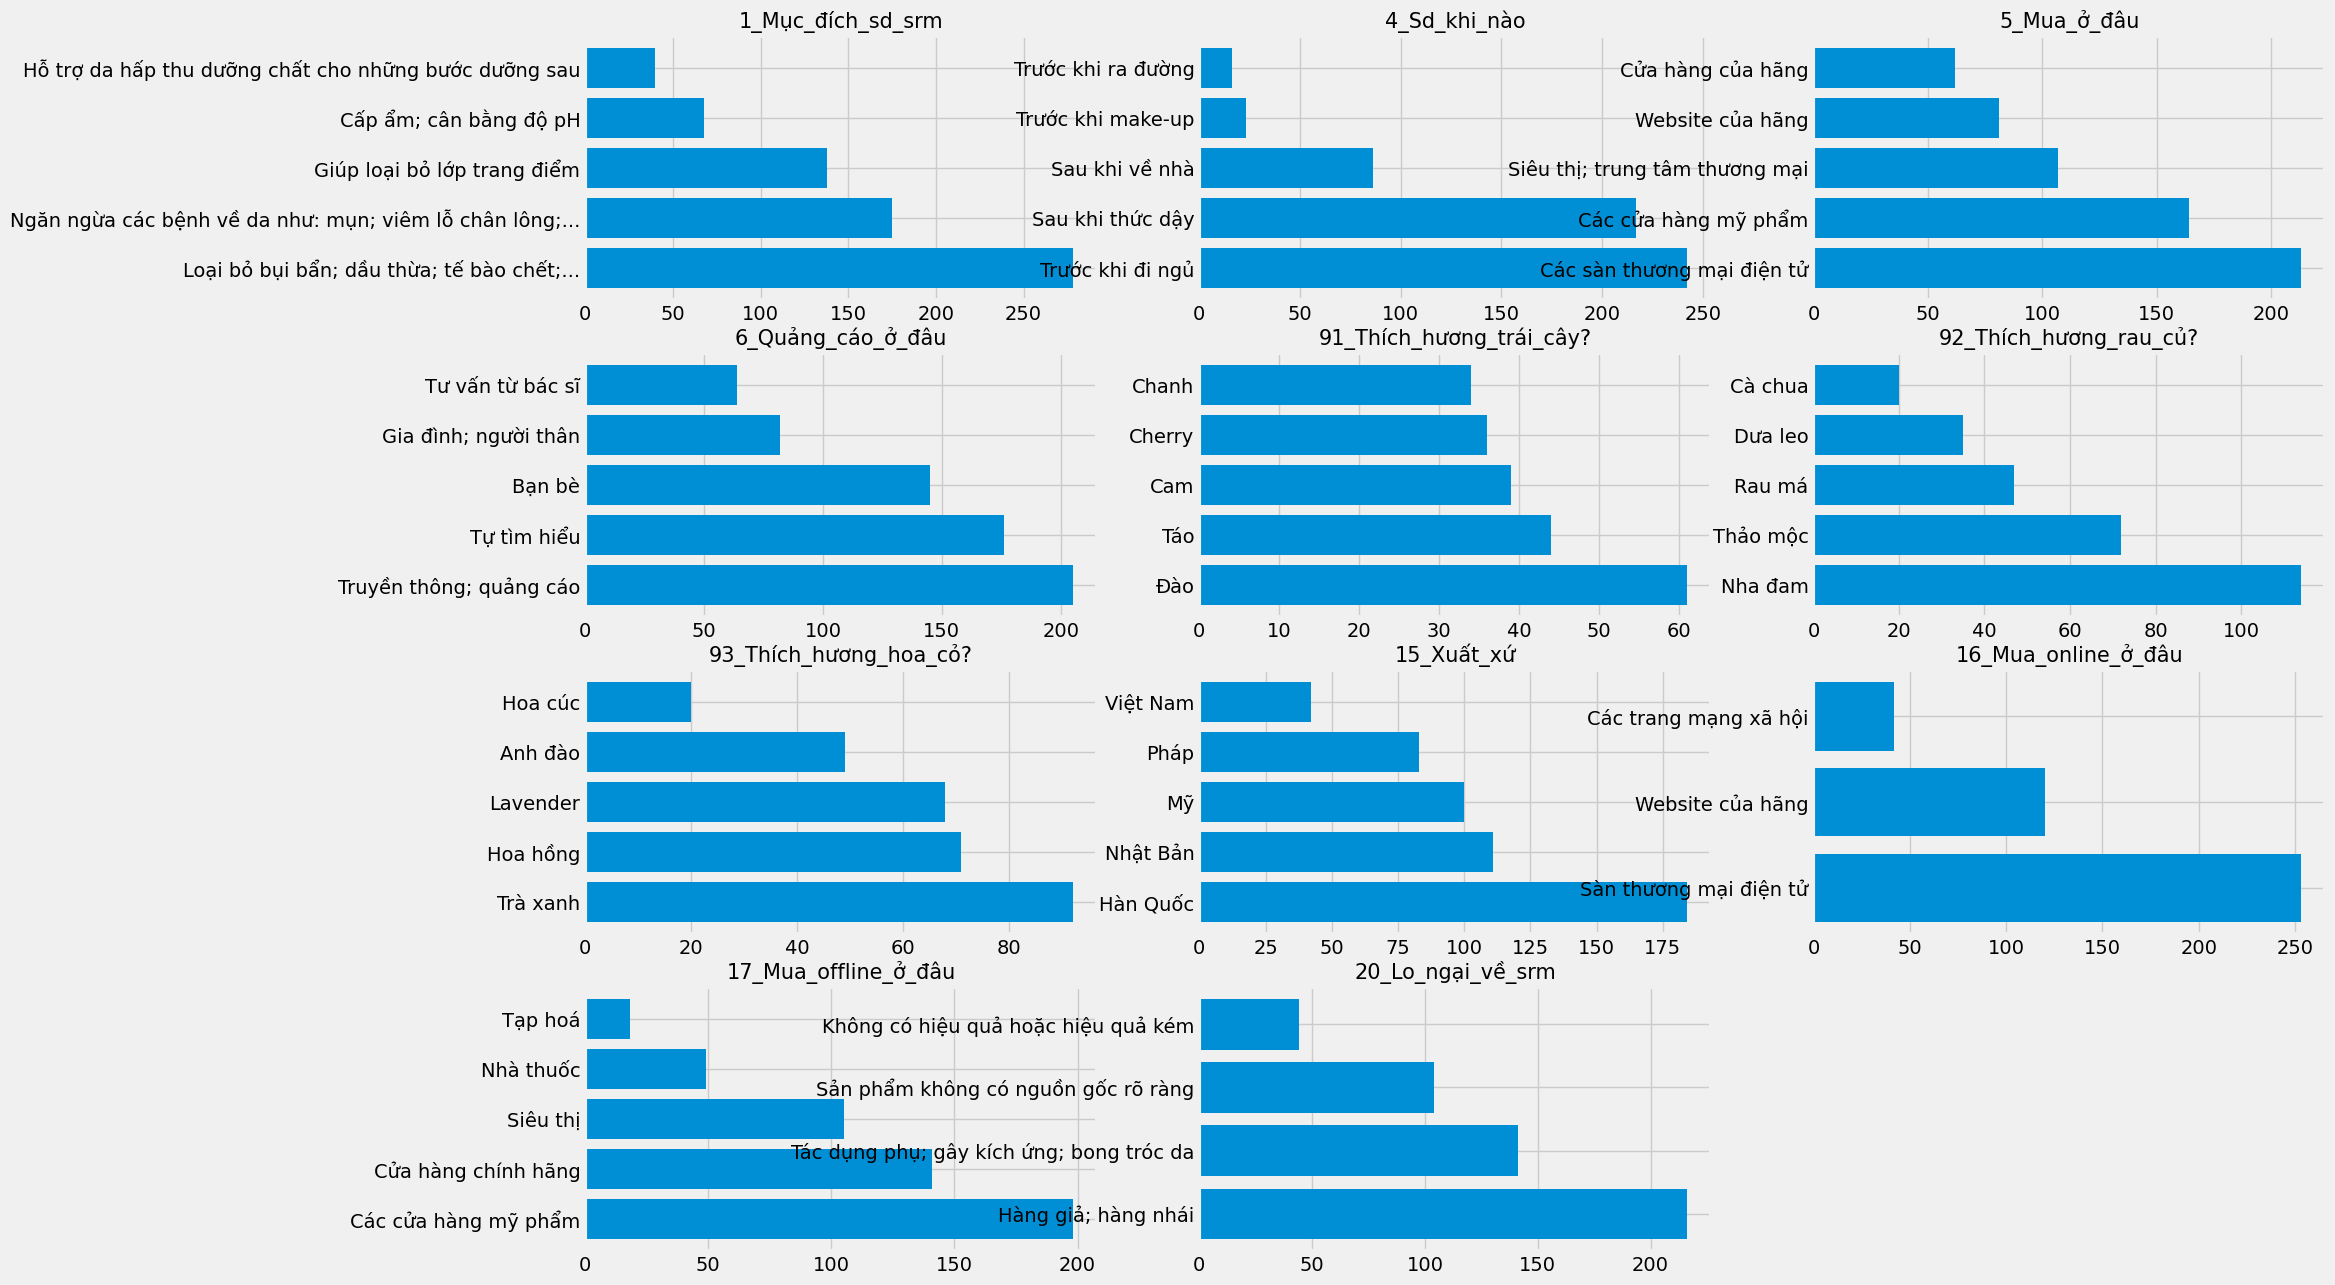

In [76]:
# TODO: code step 2
# raise NotImplementedError()
# Plot bar chart for each distribution

fig, axes = plt.subplots(4, 3, figsize=(20,15))
axes = axes.flatten()

# plot top 5 values for each distribution
for i, col in enumerate(multiple_cate_profile.columns):
    distribution = multiple_cate_profile.loc['distribution', col]
    x = list(distribution.keys())
    y = list(distribution.values())
    axes[i].barh(x[:5], y[:5])
    axes[i].set_title(col, fontsize=15)

# plt.tight_layout()
plt.delaxes(axes[-1])
plt.show()


- Finally, you will perform **one-hot encoding** on categorical columns. One-hot encoding is a popular pre-processing method for categorical data. What is one-hot encoding? What does it use for?

    **TODO**: ...
    - One-hot encoding is a process by which categorical variables are converted into binary vectors. The numbers 0 and 1 indicate whether a category is present or not in a row for a given column.
    - One-hot encoding is employed to convert categorical data into a format that can be provided to ML algorithms to improve prediction accuracy.

- Since performing one-hot encoding on single answer columns is quite easy, you will perform this technique on multiple answer columns. In this part, you can use `for` loop to loop through the column and pre-process them. However, it would be better if you don't use loop for this task. The final dataframe is save to `one_hot_df`

- Note that do not touch `df` since it will be used to check your answer.

In [59]:
# TODO: perform one-hot encoding on multiple_answer_cols
# raise NotImplementedError()

one_hot_df = pd.DataFrame()
for col in clean_df.columns:
    # Keep the original index for grouping
    one_hot_col = pd.get_dummies(clean_df[col].str.split(',').explode(), prefix=col)
    one_hot_col = one_hot_col.groupby(level=0).sum()
    one_hot_df = pd.concat([one_hot_df, one_hot_col], axis=1)

# Perform one-hot encoding
one_hot_df


,1_Mục_đích_sd_srm_Cấp ẩm; cân bằng độ pH,1_Mục_đích_sd_srm_Giúp loại bỏ lớp trang điểm,1_Mục_đích_sd_srm_Hỗ trợ da căng bóng,1_Mục_đích_sd_srm_Hỗ trợ da hấp thu dưỡng chất cho những bước dưỡng sau,1_Mục_đích_sd_srm_Hỗ trợ làm trắng da,1_Mục_đích_sd_srm_Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,1_Mục_đích_sd_srm_Ngăn ngừa các bệnh về da như: mụn; viêm lỗ chân lông;...,4_Sd_khi_nào_Sau khi thức dậy,4_Sd_khi_nào_Sau khi về nhà,4_Sd_khi_nào_Trước khi make-up,...,17_Mua_offline_ở_đâu_Các cửa hàng mỹ phẩm,17_Mua_offline_ở_đâu_Cửa hàng chính hãng,17_Mua_offline_ở_đâu_Cửa hàng tiện lợi,17_Mua_offline_ở_đâu_Nhà thuốc,17_Mua_offline_ở_đâu_Siêu thị,17_Mua_offline_ở_đâu_Tạp hoá,20_Lo_ngại_về_srm_Hàng giả; hàng nhái,20_Lo_ngại_về_srm_Không có hiệu quả hoặc hiệu quả kém,20_Lo_ngại_về_srm_Sản phẩm không có nguồn gốc rõ ràng,20_Lo_ngại_về_srm_Tác dụng phụ; gây kích ứng; bong tróc da
0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,1,1,1,0,0,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
331,0,0,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
332,1,0,1,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,0,1,0
334,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0


In [60]:
# TEST
for i in range(len(df)):
    if i != 7 and i != 168:
        assert sum(one_hot_df.iloc[i]) == sum([len(item.split(', ')) if item is not np.nan else 0 for item in df.iloc[i]])

- What does the test mean? In the test, why don't I test the row #7 and #168?

    **TODO** (OPTIONAL): ...
    - The test checks total number of chosen options in each row.
    - In row #168, there is a comma at the end, causing the total number of chosen options to increase by 1.
    - I'm unsure why row #7 is not being tested.

## 4. Question proposing & Answering

- In this section, you are going to answer my 2 questions and prose 1 question. Note that these questions can all be answered by analyzing data. Theoretically, the proposed question have to benefit at a certain level. But this is exercise about `Pandas`, my questions can be aimed more at technical side than the meaningful side. But your question has to be meaningful :v

### 4.0. What is the difference in scent preference when choosing a facial cleanser between male and female participants?

- In order to answer this question, You have to compare the choice of scent between male and female participants. Group bar chart might be a good option to do so.
- First, you have to filter needed columns (`'91_*', '92_*', '93_*'`) from `one_hot_df` and place them in a new dataframe call `scent_df`. You can use `for` loop to get the column names if needed.
- Then, group by `Giới_tính` to find out the distribution of scent for each gender. Save the result to `distribution_91, distribution_92, distribution_93`. You can observe the `distribution_91` in the cell code below.
- Visualize the result in a group bar chart. Groups are scents. In each group, there will be 2 columns (`Nam` and `Nữ`)

In [61]:
# TODO: answer the question
# raise NotImplementedError()

scent_df = pd.DataFrame()

for col in one_hot_df.columns:
    if col[0] == '9':
        scent_df = pd.concat([scent_df, one_hot_df[col]], axis=1)

scent_df = scent_df.merge(survey_df['Giới_tính'], left_index=True, right_index=True, how='left')
distribution = scent_df.groupby('Giới_tính').sum()

columns_91 = distribution.columns[distribution.columns.str.startswith('91')]
columns_92 = distribution.columns[distribution.columns.str.startswith('92')]
columns_93 = distribution.columns[distribution.columns.str.startswith('93')]

distribution_91 = distribution[columns_91]
distribution_92 = distribution[columns_92]
distribution_93 = distribution[columns_93]
distribution_91

,91_Thích_hương_trái_cây?_Cam,91_Thích_hương_trái_cây?_Chanh,91_Thích_hương_trái_cây?_Cherry,91_Thích_hương_trái_cây?_Dâu,91_Thích_hương_trái_cây?_Khác,91_Thích_hương_trái_cây?_Mâm xôi,91_Thích_hương_trái_cây?_Táo,91_Thích_hương_trái_cây?_Việt quất,91_Thích_hương_trái_cây?_Đào
Giới_tính,,,,,,,,,
Nam,9,10,8,6,2,2,11,12,12
Nữ,30,24,28,28,11,9,33,21,49


In [62]:
# TEST
assert dict(distribution_91['91_Thích_hương_trái_cây?_Việt quất']) == {'Nam': 12, 'Nữ': 21}
assert dict(distribution_92['92_Thích_hương_rau_củ?_Cần tây']) == {'Nam': 2, 'Nữ': 3}
assert dict(distribution_93['93_Thích_hương_hoa_cỏ?_Anh đào']) == {'Nam': 7, 'Nữ': 42}

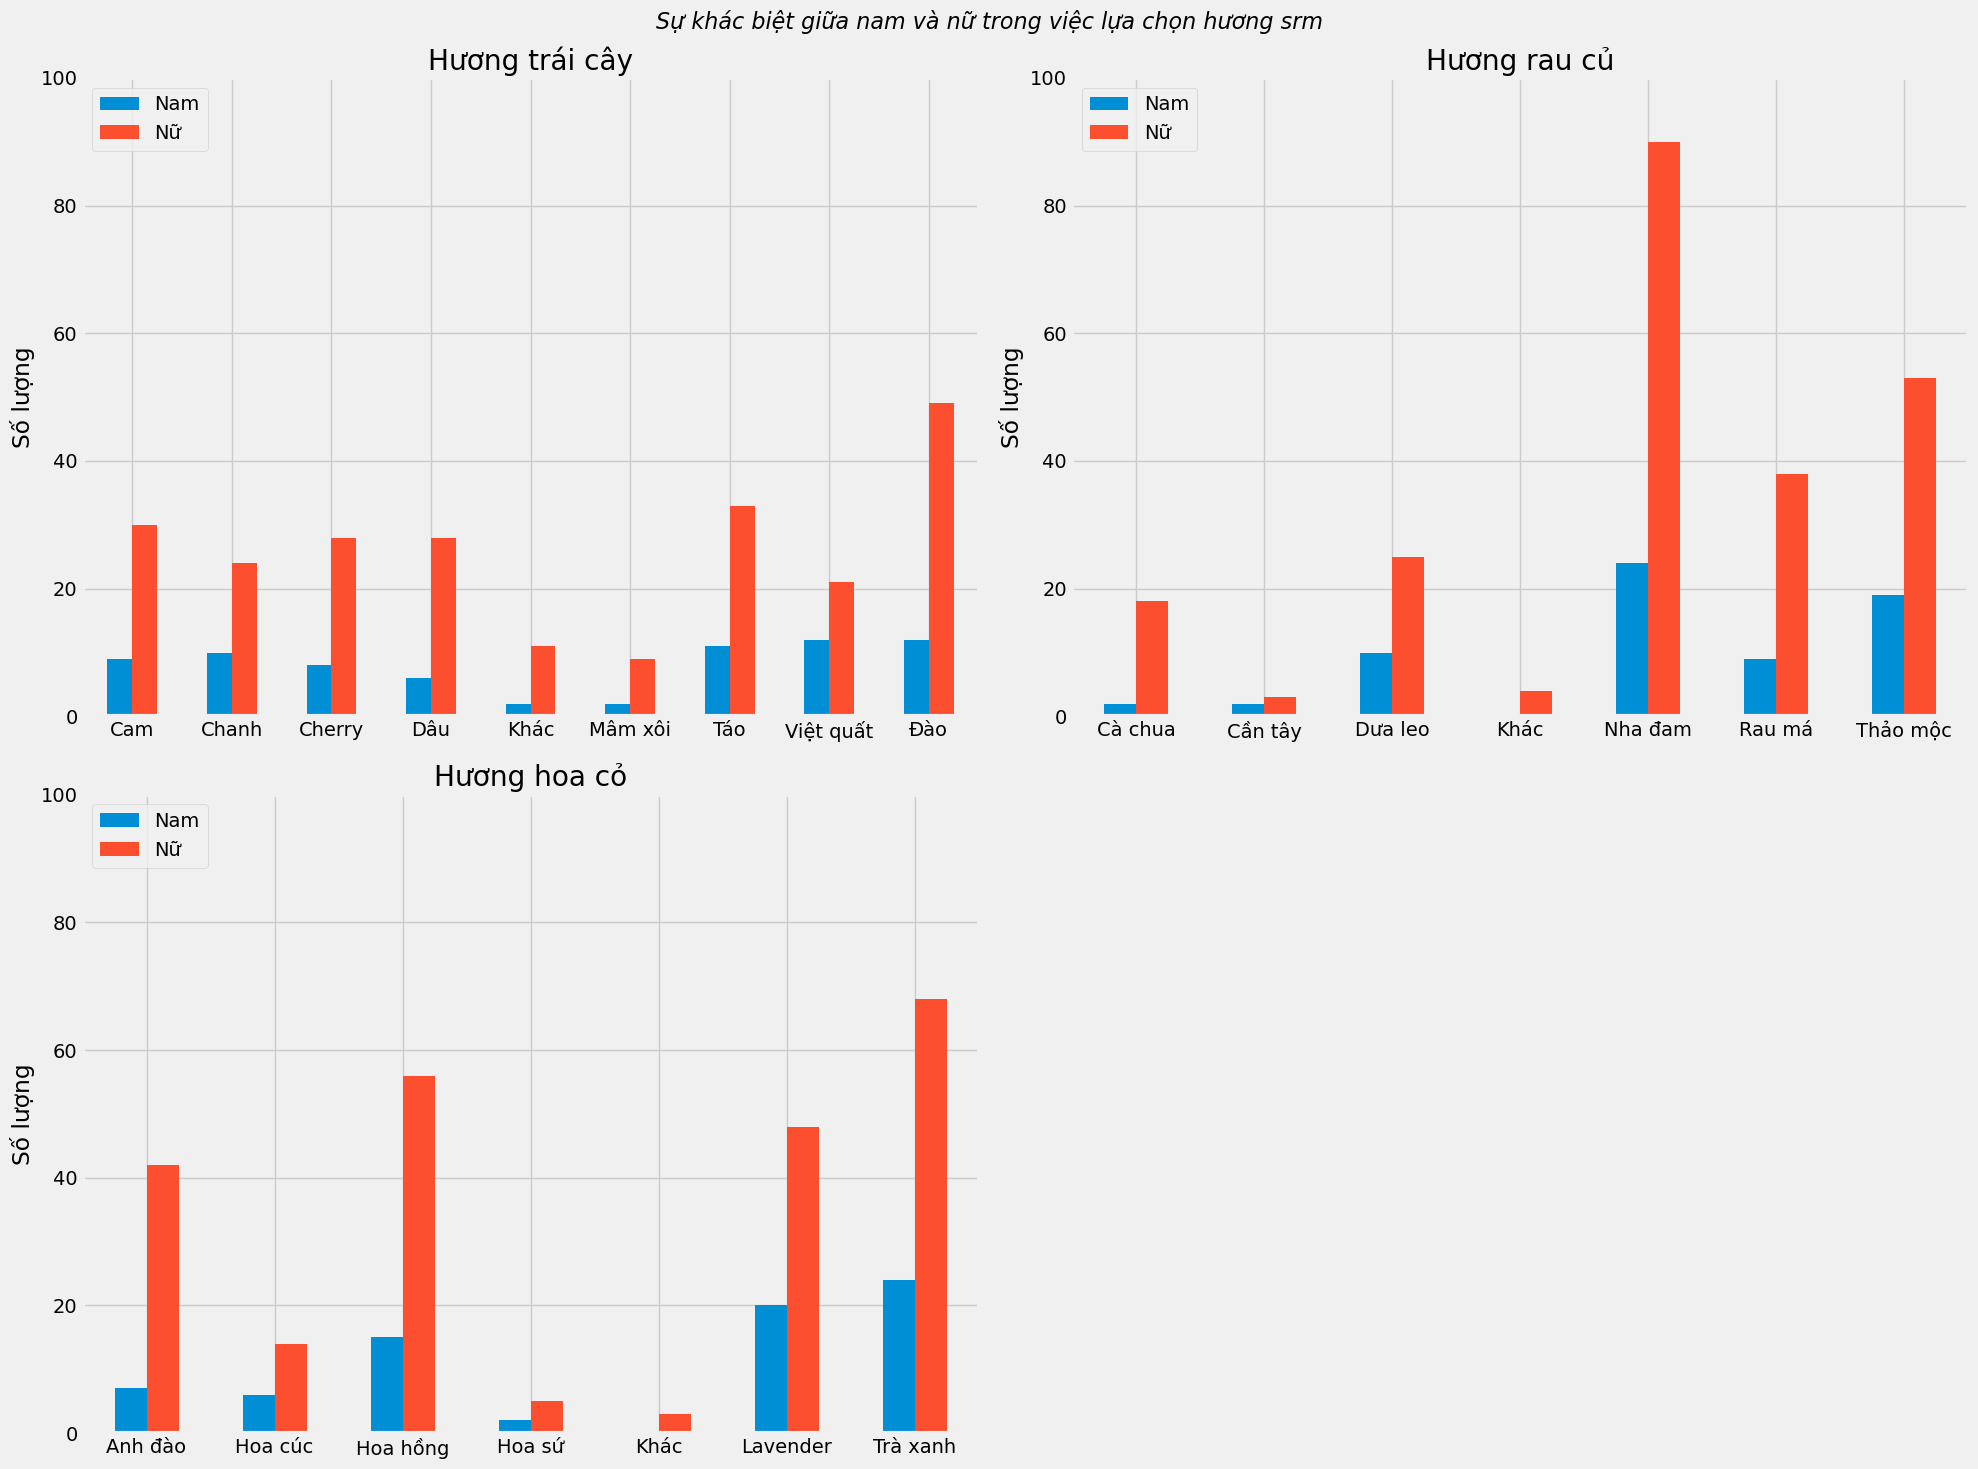

In [91]:
# TODO: Visualize 3 distribution. The chart below is an example for distribution_91
# raise NotImplementedError()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

distribution_91_to_plot = distribution_91.T.reset_index(names='Column')
distribution_91_to_plot.plot(x='Column', y=['Nam', 'Nữ'], kind='bar', ax=axes[0])
columns = distribution_91_to_plot['Column'].str.split('_').apply(lambda x: x[-1])

axes[0].set_xticklabels(columns, rotation=0)
axes[0].set_xlabel(None)
axes[0].legend(loc='upper left')
axes[0].set_ylim(0, 100)
axes[0].set_title('Hương trái cây')
axes[0].set_ylabel('Số lượng')

distribution_92_to_plot = distribution_92.T.reset_index(names='Column')
distribution_92_to_plot.plot(x='Column', y=['Nam', 'Nữ'], kind='bar', ax=axes[1])
columns = distribution_92_to_plot['Column'].str.split('_').apply(lambda x: x[-1])
axes[1].set_xticklabels(columns, rotation=0)
axes[1].set_xlabel(None)
axes[1].legend(loc='upper left')
axes[1].set_ylim(0, 100)
axes[1].set_title('Hương rau củ')
axes[1].set_ylabel('Số lượng')

distribution_93_to_plot = distribution_93.T.reset_index(names='Column')
distribution_93_to_plot.plot(x='Column', y=['Nam', 'Nữ'], kind='bar', ax=axes[2])
columns = distribution_93_to_plot['Column'].str.split('_').apply(lambda x: x[-1])
axes[2].set_xticklabels(columns, rotation=0)
axes[2].set_xlabel(None)
axes[2].legend(loc='upper left')
axes[2].set_ylim(0, 100)
axes[2].set_title('Hương hoa cỏ')
axes[2].set_ylabel('Số lượng')

fig.delaxes(axes[-1])
fig.suptitle('Sự khác biệt giữa nam và nữ trong việc lựa chọn hương srm', fontsize=16, style='oblique')
plt.tight_layout()
plt.show()

### 4.1. What is the most important factor when choosing a facial cleanser between male and female participants?

- Hint: See the question #22 in `./form.pdf`.
- This question can be answered in the same way as question 1 but it is much easier because the data is single answer data.
    - Save the distribution of male and female participants to 2 dictionaries named `male_factors` and `female_factors`
    - Then visualize the result as question 1

In [64]:
# TODO: answer the question
# raise NotImplementedError()
temp_df = survey_df.groupby('Giới_tính')['13_Tiêu_chí_chọn_srm'].value_counts()
male_factors = temp_df['Nam'].to_dict()
female_factors = temp_df['Nữ'].to_dict()

In [65]:
# TEST
assert male_factors == {'Thành phần': 32, 'Xuất xứ': 14, 'Giá cả': 10, 'Mùi hương': 2, 'Thể tích, dung tích': 2, 'Bao bì': 1}
assert female_factors == {'Thành phần': 161, 'Xuất xứ': 36, 'Giá cả': 34, 'Thể tích, dung tích': 7, 'Mùi hương': 5, 'Bao bì': 1}

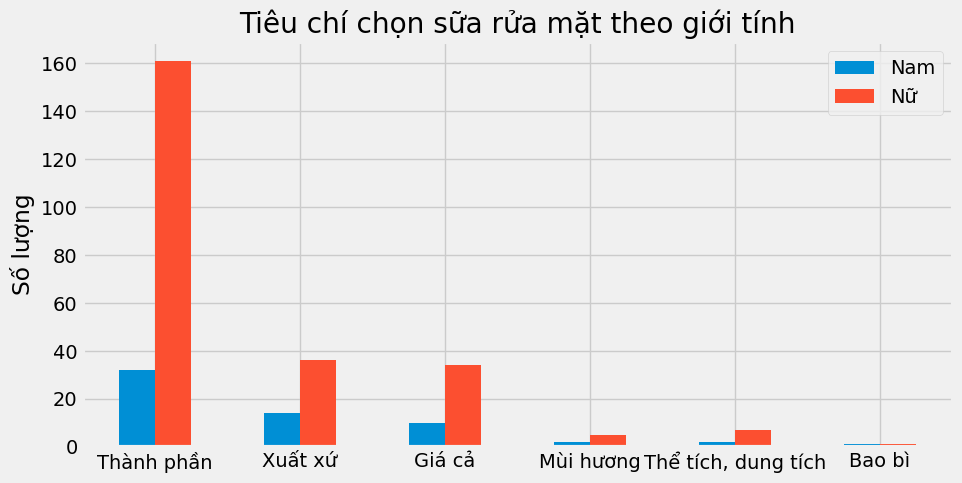

In [66]:
# TODO: Visualize
# raise NotImplementedError()

factors_df = pd.DataFrame([male_factors, female_factors], index=['Nam', "Nữ"])
factors_df_to_plot = factors_df.T.reset_index(names='Column')
factors_df_to_plot.plot(x='Column', y=['Nam', 'Nữ'], kind='bar', figsize=(10, 5))
plt.xticks(rotation=0)
plt.xlabel(None)
plt.title('Tiêu chí chọn sữa rửa mặt theo giới tính')
plt.ylabel('Số lượng')
plt.show()


### 4.2. What are the problems with each type of skin?

- What are the purposes of answering your questions?
    - Each type of skin may have its own set of problems. Understanding the common issues associated with each skin type and identifying which type is most likely to  purchase a facial cleanser will provide us with a more straightforward direction for developing a new product.
    - Developing a new product that is suitable for specific skin types that commonly experience issues will help us enhance the product's quality, thereby fostering a stronger bond with our customers.
- Answer your question then visualize if needed.

In [67]:
# TODO: answer your question here
# raise NotImplementedError()

purpose_cols = one_hot_df.columns[one_hot_df.columns.str.startswith('1_')]
purpose_df = one_hot_df[purpose_cols]
# Add skin type columns
typeskin_purpose_df = pd.merge(purpose_df, survey_df['2_Loại_da'], left_index=True, right_index=True, how='left')
typeskin_purpose_df = typeskin_purpose_df.groupby('2_Loại_da').sum()
typeskin_purpose_df

,1_Mục_đích_sd_srm_Cấp ẩm; cân bằng độ pH,1_Mục_đích_sd_srm_Giúp loại bỏ lớp trang điểm,1_Mục_đích_sd_srm_Hỗ trợ da căng bóng,1_Mục_đích_sd_srm_Hỗ trợ da hấp thu dưỡng chất cho những bước dưỡng sau,1_Mục_đích_sd_srm_Hỗ trợ làm trắng da,1_Mục_đích_sd_srm_Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,1_Mục_đích_sd_srm_Ngăn ngừa các bệnh về da như: mụn; viêm lỗ chân lông;...
2_Loại_da,,,,,,,
Da dầu,18,47,1,4,11,85,54
Da hỗn hợp,24,49,5,17,13,92,54
Da khô,13,14,1,6,6,37,26
Da lành tính,6,8,5,5,6,23,9
Da mụn,1,9,1,1,0,17,12
Da nhạy cảm,6,11,1,7,3,24,20


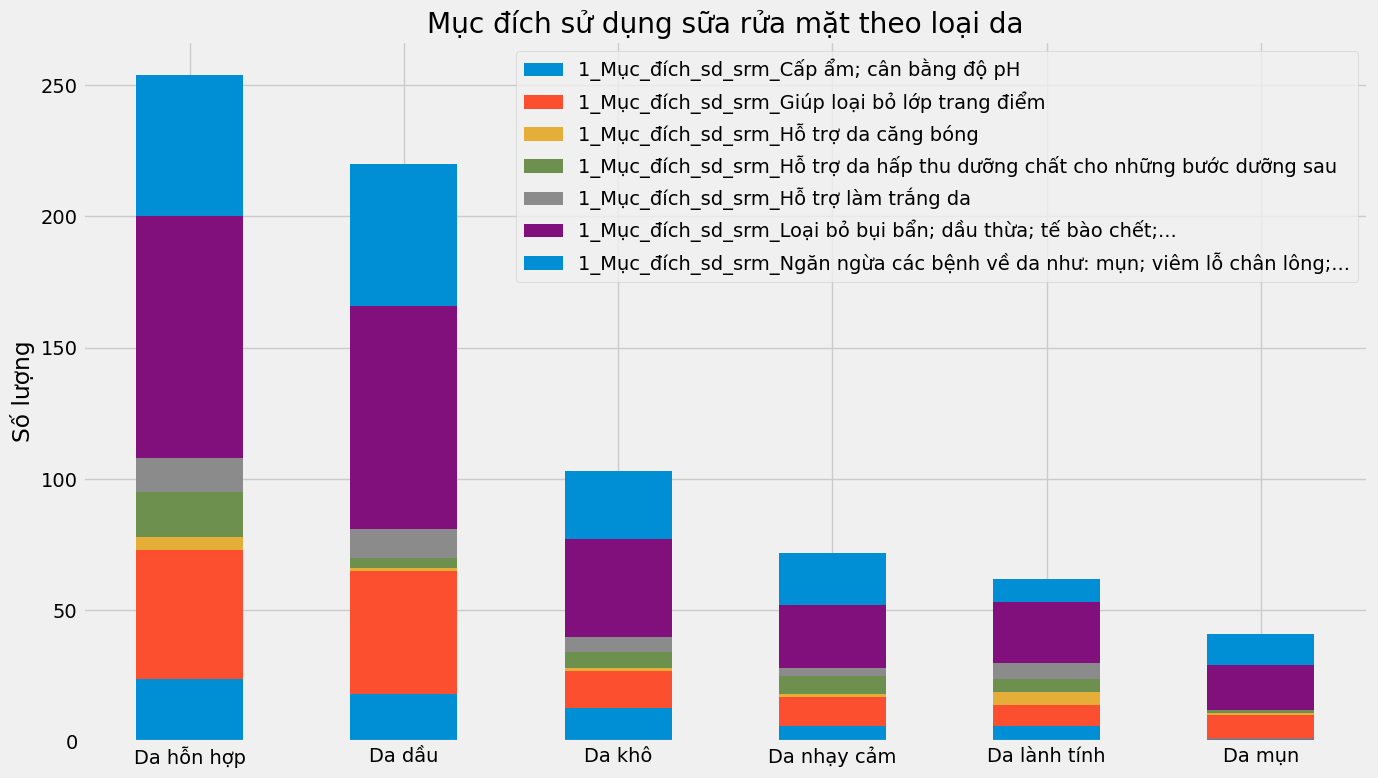

In [85]:
# TODO (OPTIONAL): visualize

# Sort the values by total number of users
typeskin_purpose_df['Total'] = typeskin_purpose_df.sum(axis=1)
typeskin_purpose_df = typeskin_purpose_df.sort_values(by='Total', ascending=False)
typeskin_purpose_df = typeskin_purpose_df.drop('Total', axis=1)
# Plot one stacked bar chart for all skin types
fig, ax = plt.subplots(figsize=(14, 8))
typeskin_purpose_df.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation=0)
plt.xlabel(None)   
plt.ylabel('Số lượng')
# reduce size of legend
plt.legend(loc='upper right')
plt.title('Mục đích sử dụng sữa rửa mặt theo loại da')
plt.tight_layout()
plt.show()